In [1]:
!pip install gym_super_mario_bros==7.3.0 nes_py

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 198 kB 33.3 MB/s 
     |████████████████████████████████| 77 kB 7.3 MB/s 
  Created wheel for nes-py: filename=nes_py-8.2.1-cp37-cp37m-linux_x86_64.whl size=436914 sha256=a7d79bf0109e36470e9b83d2c7ace497d887b83a94254596c5b8fb9c7f3840d8
  Stored in directory: /root/.cache/pip/wheels/17/96/0e/22a8c7dbdf412d8e988286f223b223baf0f4ad90c9e699c56d
Successfully built nes-py


In [2]:
import gym_super_mario_bros ##import the game
from nes_py.wrappers import JoypadSpace ##import joypad
from gym_super_mario_bros.actions import SIMPLE_MOVEMENT ##simple controls

In [3]:
SIMPLE_MOVEMENT  ##only 7 actions can mario take--

[['NOOP'],
 ['right'],
 ['right', 'A'],
 ['right', 'B'],
 ['right', 'A', 'B'],
 ['A'],
 ['left']]

In [ ]:
## important website - https://pypi.org/project/gym-super-mario-bros/  
## all the required information - (enviroments)

In [4]:
##setup game
env = gym_super_mario_bros.make('SuperMarioBros2-v1')
env = JoypadSpace(env,SIMPLE_MOVEMENT)

In [5]:
env.action_space ## 7 actions 

Discrete(7)

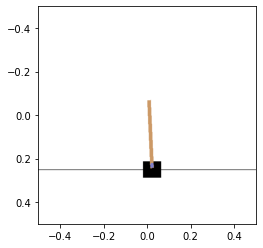

In [7]:
!apt-get install python-opengl -y

!apt install xvfb -y

!pip install pyvirtualdisplay

!pip install piglet


from pyvirtualdisplay import Display
Display().start()

import gym
from IPython import display
import matplotlib.pyplot as plt
%matplotlib inline

env = gym.make('CartPole-v0')
env.reset()
img = plt.imshow(env.render('rgb_array')) # only call this once
for _ in range(40):
    img.set_data(env.render('rgb_array')) # just update the data
    display.display(plt.gcf())
    display.clear_output(wait=True)
    action = env.action_space.sample()
    env.step(action)

In [ ]:
## create flag to restart a game or not 
done = True 
for step in range(100000):                                     ## loop through each frame step in game
    if done:                                                   ## begin the game
        env.reset()
    state,reward,done,info=env.step(env.action_space.sample()) ## taking random action defined in SIMPLE_MOVEMENT
    env.render()                                               ## show game on screen
env.close()

In [ ]:
env.close()

In [6]:
env.step(1)   ## understanding states and rewards

AssertionError: ignored

## STEP 2 : Preprocess the environment

In [8]:
!pip install stable-baselines3[extra]

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 177 kB 29.8 MB/s 
     |████████████████████████████████| 1.5 MB 56.4 MB/s 
     |████████████████████████████████| 1.6 MB 61.1 MB/s 
     |████████████████████████████████| 1.1 MB 55.1 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Created wheel for gym: filename=gym-0.21.0-py3-none-any.whl size=1616825 sha256=07cd3ccff7f05ab93ec43e41c7dc99f4de99d40d706e350cf9edf84a30713a81
  Stored in directory: /root/.cache/pip/wheels/76/ee/9c/36bfe3e079df99acf5ae57f4e3464ff2771b34447d6d2f2148
  Created wheel for AutoROM.accept-rom-license: filename=AutoROM.accept_rom_license-0.4.2-py3-none-any.whl size=441027 sha256=e1ad8b291f5e0d8bd2e3f880e660a500d4b7992fca3320fd27e03cef51720375
  Stored in directory: /root/.cache/pip/wheels/87/67/2e/6147e7912fe37f5408b80d07527dab807c1d25f5c4

In [9]:
from gym.wrappers import GrayScaleObservation
##import frame stack wrapper & grayscale wrapper 

##import vectorizations wrapper
from stable_baselines3.common.vec_env import VecFrameStack,DummyVecEnv  #3 for RL stuff
import matplotlib.pyplot as plt                                        ## understanding impact of FrameStacking

## install pytorch

In [ ]:
!pip3 install torch==1.2.0+cu92 torchvision==0.4.0+cu92 -f https://download.pytorch.org/whl/torch_stable.html

In [10]:
# 1. Create base enviornment 
env = gym_super_mario_bros.make('SuperMarioBros2-v1')
# 2. simplyfy controls 
env = JoypadSpace(env,SIMPLE_MOVEMENT)
# 3.Grayscale
env= GrayScaleObservation(env,keep_dim=True)
#4. Wrap inside the dummy env
env= DummyVecEnv([lambda: env])
#5. stack the frames

env=VecFrameStack(env,4,channels_order='last')

In [11]:
state=env.reset()
state.shape

(1, 240, 256, 4)

In [12]:
 state,reward,done,info=env.step([env.action_space.sample()])

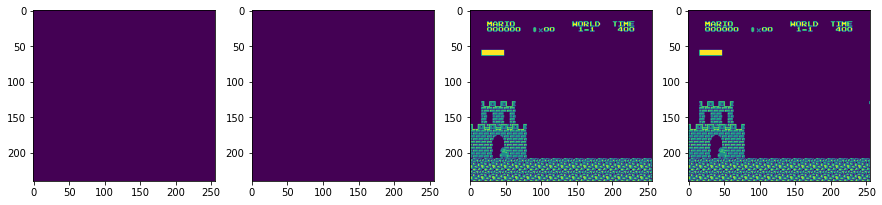

In [13]:
plt.figure(figsize=(15,12))
for idx in range(state.shape[3]):
    plt.subplot(1,4,idx+1)
    plt.imshow(state[0][:,:,idx])
plt.show()    

In [ ]:
env.reset()

In [15]:
 state,reward,done,info=env.step([5]) ## run several times to see mario is jumping 

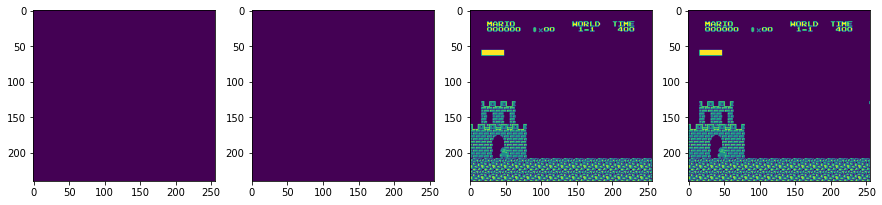

In [16]:
plt.figure(figsize=(15,12))
for idx in range(state.shape[3]):
    plt.subplot(1,4,idx+1)
    plt.imshow(state[0][:,:,idx])
plt.show()                          ## run several times

3. train RL model :
      PPO algortithm : Proximal Policy Optimization

In [17]:
import os 
from stable_baselines3 import PPO
from stable_baselines3.common.callbacks import BaseCallback  ## bascallback for saving models

In [18]:
class TrainAndLoggingCallback(BaseCallback):

    def __init__(self, check_freq, save_path, verbose=1):
        super(TrainAndLoggingCallback, self).__init__(verbose)
        self.check_freq = check_freq
        self.save_path = save_path

    def _init_callback(self):
        if self.save_path is not None:
            os.makedirs(self.save_path, exist_ok=True)

    def _on_step(self):
        if self.n_calls % self.check_freq == 0:
            model_path = os.path.join(self.save_path, 'best_model_{}'.format(self.n_calls))
            self.model.save(model_path)

        return True

In [19]:
CHECKPOINT_DIR = 'C:\\Users\\piyus\\OneDrive\\Desktop\\models'
LOG_DIR = 'C:\\Users\\piyus\\OneDrive\\Desktop\\logs'

In [20]:
# Setup model saving callback
callback = TrainAndLoggingCallback(check_freq=10000, save_path=CHECKPOINT_DIR)

In [21]:
model = PPO('CnnPolicy', env, verbose=1, learning_rate=0.000001, 
            n_steps=512) 

Using cuda device
Wrapping the env in a VecTransposeImage.


In [22]:
model.learn(total_timesteps=100000)

/usr/local/lib/python3.7/dist-packages/gym_super_mario_bros/smb_env.py:148: RuntimeWarning: overflow encountered in ubyte_scalars
  return (self.ram[0x86] - self.ram[0x071c]) % 256


----------------------------
| time/              |     |
|    fps             | 55  |
|    iterations      | 1   |
|    time_elapsed    | 9   |
|    total_timesteps | 512 |
----------------------------
-------------------------------------------
| time/                   |               |
|    fps                  | 59            |
|    iterations           | 2             |
|    time_elapsed         | 17            |
|    total_timesteps      | 1024          |
| train/                  |               |
|    approx_kl            | 2.4639303e-06 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -1.95         |
|    explained_variance   | -0.00501      |
|    learning_rate        | 1e-06         |
|    loss                 | 253           |
|    n_updates            | 10            |
|    policy_gradient_loss | -7.02e-05     |
|    value_loss           | 525           |
-------------------------------------------
-----

KeyboardInterrupt: ignored

In [23]:
model.save('thisisatestmodel')


Here model starts to learn 
AI model train

In [24]:
# Load model
model = PPO.load('thisisatestmodel')

In [25]:
state=env.reset() ## start game


In [26]:
SIMPLE_MOVEMENT[model.predict(state)[0][0]]

['A']

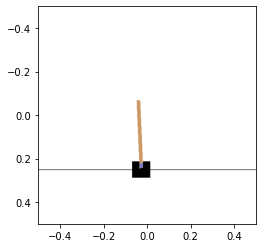

In [29]:
!apt-get install python-opengl -y

!apt install xvfb -y

!pip install pyvirtualdisplay

!pip install piglet


from pyvirtualdisplay import Display
Display().start()

import gym
from IPython import display
import matplotlib.pyplot as plt
%matplotlib inline

env = gym.make('CartPole-v0')
env.reset()
img = plt.imshow(env.render('rgb_array')) # only call this once
for _ in range(40):
    img.set_data(env.render('rgb_array')) # just update the data
    display.display(plt.gcf())
    display.clear_output(wait=True)
    action = env.action_space.sample()
    env.step(action)

In [35]:
# Start the game 
state = env.reset()
# Loop through the game
while True: 
    
    action, _ = model.predict(state)
    state, reward, done, info = env.step(action)
    env.render()

ValueError: ignored